In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sys
import math
import matplotlib.colors as mcolors
from scipy.spatial import ConvexHull
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.gridspec as gridspec
from matplotlib.ticker import ScalarFormatter
from matplotlib.patches import ConnectionPatch

In [3]:
loaded_data = np.load('RESULT_2d_new.npz')
W1 = loaded_data['W1']
W2 = loaded_data['W2']
W3 = loaded_data['W3']
XXU = loaded_data['XXU']
W_wave=loaded_data['W_wave']
W_ttu=loaded_data['W_ttu']
W_sta=loaded_data['W_sta']
W_env=loaded_data['W_env']
st11=loaded_data['st11']
st22=loaded_data['st22']
ssx = loaded_data['ssx']
ssy = loaded_data['ssy']
t = loaded_data['t']
x = loaded_data['x']
y = loaded_data['y']
V = loaded_data['V']
t = loaded_data['t']
Time = loaded_data['Time']

In [ ]:
ln=1
NN=12
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = NN  # 默认字号
plt.rcParams['axes.labelsize'] = NN  # 坐标轴标签字号
plt.rcParams['axes.titlesize'] = NN 
plt.rcParams['xtick.labelsize'] = NN  # X轴刻度字号
plt.rcParams['ytick.labelsize'] = NN  # Y轴刻度字号
plt.rcParams['legend.fontsize'] = NN  # 图例字号
plt.rcParams['axes.labelpad'] =.1
plt.rcParams['xtick.direction'] = 'in'  # X轴刻度朝内
plt.rcParams['ytick.direction'] = 'in'  # Y轴刻度朝内
morandi_colors = ['#4169E1', '#5CD85A', '#FFA500']

<function matplotlib.pyplot.show(close=None, block=None)>

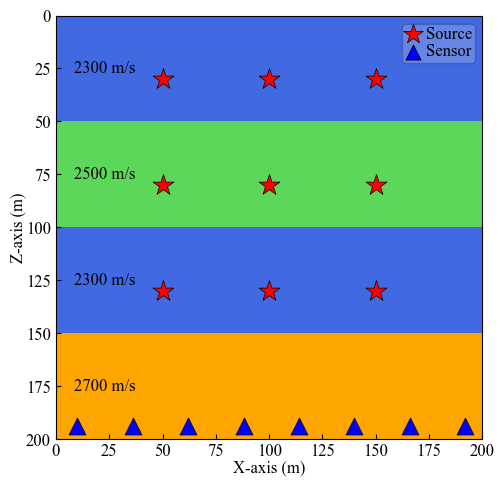

In [ ]:
plt.figure(figsize=(5.5, 5.5)) 


custom_cmap = mcolors.LinearSegmentedColormap.from_list('my_cmap', morandi_colors)
im=plt.imshow(V, aspect='auto', cmap=custom_cmap,extent=[0, x.max(), y.max(), 0])
# im=plt.imshow(V,  cmap=custom_cmap,extent=[x.min(), x.max(), y.max(), y.min()])
plt.scatter(x[st22],y[st11], c='b', marker='^', s=150, edgecolors='k', linewidths=.5)
plt.scatter(x[ssy-1],y[ssx-1], c='r', marker='*', s=250, edgecolors='k', linewidths=.5)
plt.xlabel('X-axis (m)')  
plt.ylabel('Z-axis (m)') 


layer_depths = [25, 75, 125,175]  # y坐标
speeds = ['2300 m/s', '2500 m/s', '2300 m/s', '2700 m/s']  # 对应的速度值
text_x = 23  # 文本的x坐标（水平居中）
for i, (depth, speed) in enumerate(zip(layer_depths, speeds)):
    plt.text(text_x, depth, speed, 
             fontsize=NN,  
             ha='center', va='center')


plt.figlegend(handles=[plt.scatter([], [], c='r', marker='*', s=220, edgecolors='k', linewidths=.5, label='Source'),
                       plt.scatter([], [], c='b', marker='^', s=120, edgecolors='k', linewidths=.5, label='Sensor')],
             loc='upper center', 
             bbox_to_anchor=(0.82, 0.88),  
             ncol=1,  # 水平排列
             borderpad=.15,
             handletextpad=.3,
             framealpha=0.2,          # 80%不透明度
             edgecolor='black',
             facecolor='white',
             fancybox=True,handlelength=1,labelspacing=0.1)       
          
           
            # handletextpad=.3,
            # fancybox=True,handlelength=1,labelspacing=0.1
# plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # 为底部图例留出空间




# plt.savefig("fig3.tif", dpi=300, format="tiff", bbox_inches="tight", pil_kwargs={"compression": "tiff_lzw"})
plt.show

In [22]:
X, Y = np.meshgrid(x, y)  

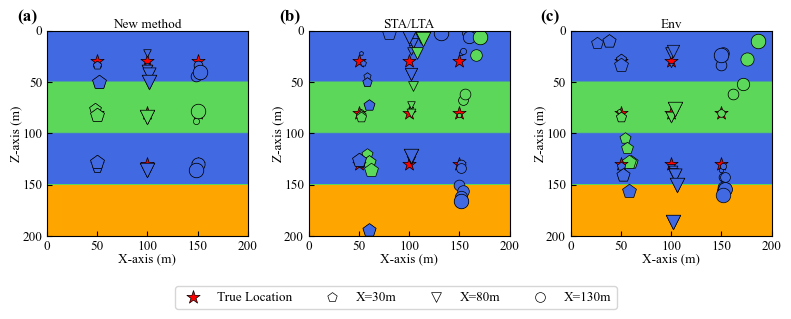

In [ ]:

ln=1
NN=9.5
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = NN  # 默认字号
plt.rcParams['axes.labelsize'] = NN  # 坐标轴标签字号
plt.rcParams['axes.titlesize'] = NN 
plt.rcParams['xtick.labelsize'] = NN  # X轴刻度字号
plt.rcParams['ytick.labelsize'] = NN  # Y轴刻度字号
plt.rcParams['legend.fontsize'] = NN  # 图例字号
plt.rcParams['axes.labelpad'] =.1
plt.rcParams['xtick.direction'] = 'in'  # X轴刻度朝内
plt.rcParams['ytick.direction'] = 'in'  # Y轴刻度朝内
morandi_colors = ['#4169E1', '#5CD85A', '#FFA500']

marker_type=['p','v','o']
mmm1=[0,0,0,1,1,1,2,2,2]
mmm=[0,1,2,0,1,2,0,1,2]
marker_colors = ['#4169E1', '#5CD85A', '#4169E1']
title=['New method','STA/LTA','Env']
labels = ['(a)', '(b)','(c)']

plt.figure(figsize=(8, 3.2)) 
for meth in range(3):
    plt.subplot(1,3,meth+1)
    im=plt.imshow(V, aspect='auto', cmap=custom_cmap,extent=[0, x.max(), y.max(), 0])
    plt.title(title[meth],pad=2)
    plt.xlabel('X-axis (m)')  
    plt.ylabel('Z-axis (m)') 
    for N_event in range(9):
        plt.scatter(x[ssy[N_event]-1], y[ssx[N_event]-1], c='r', marker='*', s=100, edgecolors='k', linewidths=.5)

        for i in range(XXU.shape[3]):
            xu=np.array(XXU[meth,:,N_event,i],dtype=int)
            point_x = X[xu[0], xu[1]]
            point_y = Y[xu[0], xu[1]]
            mar=marker_type[mmm[N_event]]
            col=marker_colors[mmm1[N_event]]
            plt.scatter(point_x,point_y, c=col, marker=mar, s=10+i*10, edgecolors='k', linewidths=.5)
    ax = plt.gca() 
    plt.text(
        -0.15, 1.1, labels[meth], 
        transform=ax.transAxes,  
        fontsize=NN+3,
        weight='bold',
        color='black',
        va='top',  
        ha='left'  
    )
# 简化图例，只显示关键标记
plt.figlegend(handles=[plt.scatter([], [], c='r', marker='*', s=100,edgecolors='k', linewidths=.5, label='True Location'),
                       plt.scatter([], [], c='white', marker='p', s=50,edgecolors='k', linewidths=.5, label='X=30m'),
                       plt.scatter([], [], c='white', marker='v', s=50, edgecolors='k', linewidths=.5,label='X=80m'),
                       plt.scatter([], [], c='white', marker='o', s=50, edgecolors='k', linewidths=.5,label='X=130m')],
             loc='upper center', 
             bbox_to_anchor=(0.5, 0.05),  # 图例位置在图形底部中央
             ncol=4,  # 水平排列
             frameon=True,
             fancybox=True)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # 为底部图例留出空间
# plt.savefig("fig6.tif", dpi=300, format="tiff", bbox_inches="tight", pil_kwargs={"compression": "tiff_lzw"})
plt.show()

In [24]:

wucha=np.zeros((3,9,11))
wucha_x=np.zeros((3,9,11))
wucha_y=np.zeros((3,9,11))
for meth in range(3):
    for N_event in range(9):
        for i in range(XXU.shape[3]):
            xu=np.array(XXU[meth,:,N_event,i],dtype=int)
            det_x = X[xu[0], xu[1]]-x[ssy[N_event]-1]
            det_y = Y[xu[0], xu[1]]-y[ssx[N_event]-1]
            wucha[meth,N_event,i]=np.sqrt(det_x**2+det_y**2)
            wucha_x[meth,N_event,i]=np.sqrt(det_x**2)
            wucha_y[meth,N_event,i]=np.sqrt(det_y**2)
    

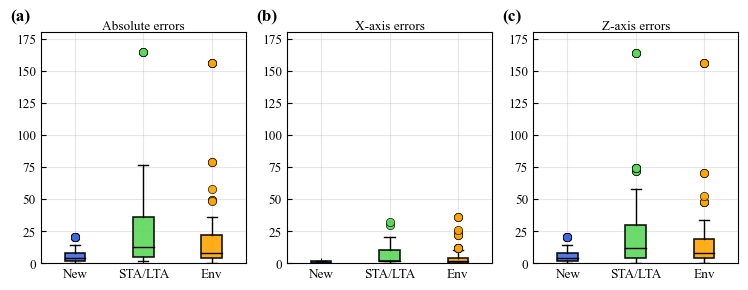

In [ ]:
ln=1
NN=9.5
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = NN  # 默认字号
plt.rcParams['axes.labelsize'] = NN  # 坐标轴标签字号
plt.rcParams['axes.titlesize'] = NN 
plt.rcParams['xtick.labelsize'] = NN  # X轴刻度字号
plt.rcParams['ytick.labelsize'] = NN  # Y轴刻度字号
plt.rcParams['legend.fontsize'] = NN  # 图例字号
plt.rcParams['axes.labelpad'] =.1
plt.rcParams['xtick.direction'] = 'in'  # X轴刻度朝内
plt.rcParams['ytick.direction'] = 'in'  # Y轴刻度朝内
morandi_colors = ['#4169E1', '#5CD85A', '#FFA500']
labels1 = ['(a)', '(b)','(c)']
title=['Absolute errors','X-axis errors','Z-axis errors']
xla=['New','STA/LTA','Env']


plt.figure(figsize=(9, 3)) 
WU=[wucha,wucha_x,wucha_y]
for i,wuchaa in enumerate(WU):
    plt.subplot(1,3,i+1)
    data=[wuchaa[0,:,:].flatten(),wuchaa[1,:,:].flatten(),wuchaa[2,:,:].flatten()]
    box_plot2 =plt.boxplot(data,labels=xla,patch_artist=True,
                          medianprops={'color': 'black', 'linewidth': 1})
    # plt.xticks(rotation=45)
    plt.ylim([0, 180])
    plt.grid(True,alpha=0.3)  
    for j, box in enumerate(box_plot2['boxes']):
        box.set_facecolor(morandi_colors[j])
        box.set_alpha(0.9)
        box.set_edgecolor('black')
        box.set_linewidth(1.2)
        flier = box_plot2['fliers'][j]
        flier.set_marker('o')  # 设置异常值的标记形状
        flier.set_markerfacecolor(morandi_colors[j])  # 设置异常值的填充颜色
        flier.set_markeredgecolor('black')  # 设置异常值的边缘颜色
        flier.set_alpha(0.9)
        flier.set_markeredgewidth(.5)
    ax = plt.gca() 
    plt.text(
        -0.15, 1.1, labels1[i], 
        transform=ax.transAxes,  
        fontsize=NN+3,
        weight='bold',
        color='black',
        va='top',  
        ha='left'  
    )
    plt.title(title[i], pad=2)
# plt.savefig("fig7.tif", dpi=300, format="tiff", bbox_inches="tight", pil_kwargs={"compression": "tiff_lzw"})
plt.show()









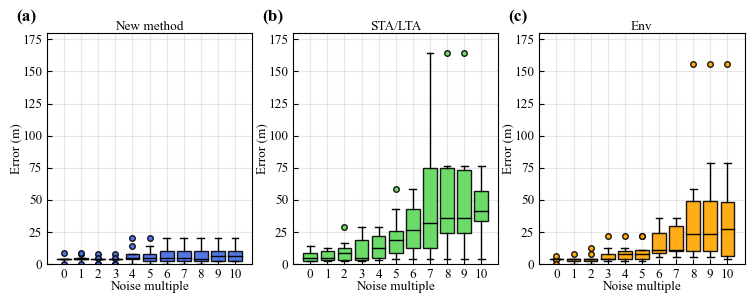

In [ ]:
ln=1
NN=9.5
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = NN  # 默认字号
plt.rcParams['axes.labelsize'] = NN  # 坐标轴标签字号
plt.rcParams['axes.titlesize'] = NN 
plt.rcParams['xtick.labelsize'] = NN  # X轴刻度字号
plt.rcParams['ytick.labelsize'] = NN  # Y轴刻度字号
plt.rcParams['legend.fontsize'] = NN  # 图例字号
plt.rcParams['axes.labelpad'] =.1
plt.rcParams['xtick.direction'] = 'in'  # X轴刻度朝内
plt.rcParams['ytick.direction'] = 'in'  # Y轴刻度朝内
morandi_colors = ['#4169E1', '#5CD85A', '#FFA500']

title = ['New method', 'STA/LTA', 'Env']
labels = ['(a)', '(b)','(c)']
plt.figure(figsize=(9, 3)) 
for i in range(wucha.shape[0]):
    plt.subplot(1, 3, i+1)
  
    flierprops = dict(marker='o', 
                      markersize=4,
                      markerfacecolor=morandi_colors[i],
                      markeredgecolor='black',
                      alpha=0.9)  # 透明度
    

    boxprops = dict(facecolor=morandi_colors[i],
                    color='black',
                    alpha=0.9)  # 透明度
    
    box1 = plt.boxplot(wucha[i, :, :],
                       patch_artist=True,
                       boxprops=boxprops,
                       medianprops={'color': 'black', 'linewidth': 1},
                       flierprops=flierprops, widths=0.8)  
    plt.xticks(range(1,12),range(0,11))
    plt.xlabel('Noise multiple') 
    plt.ylabel('Error (m)') 
    plt.grid(True, alpha=0.3)  
    plt.title(title[i], pad=2)
    plt.xlim([0, 12])
    plt.ylim([0, 180])
    ax = plt.gca() 
    plt.text(
        -0.15, 1.1, labels[i], 
        transform=ax.transAxes,  
        fontsize=NN+3,
        weight='bold',
        color='black',
        va='top',  
        ha='left'  
    )
# plt.savefig("fig8.tif", dpi=300, format="tiff", bbox_inches="tight", pil_kwargs={"compression": "tiff_lzw"})
plt.show()

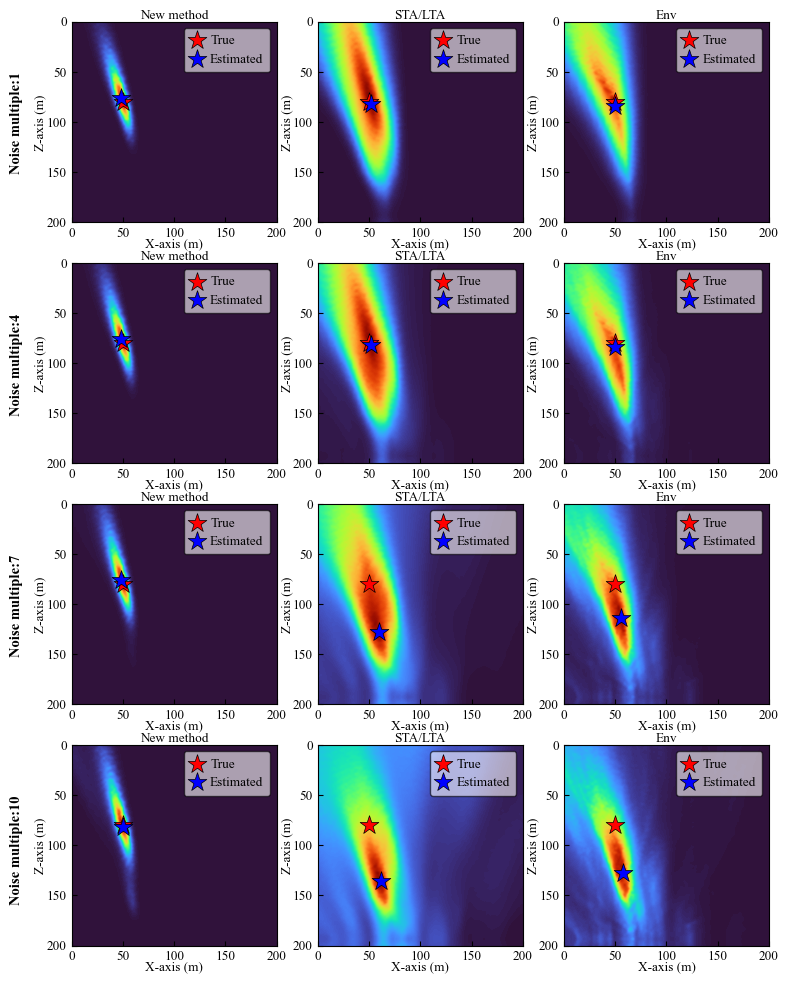

In [ ]:
NN=9.5
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = NN  # 默认字号
plt.rcParams['axes.labelsize'] = NN  # 坐标轴标签字号
plt.rcParams['axes.titlesize'] = NN 
plt.rcParams['xtick.labelsize'] = NN  # X轴刻度字号
plt.rcParams['ytick.labelsize'] = NN  # Y轴刻度字号
plt.rcParams['legend.fontsize'] = NN  # 图例字号
plt.rcParams['axes.labelpad'] =.1
plt.rcParams['xtick.direction'] = 'in'  # X轴刻度朝内
plt.rcParams['ytick.direction'] = 'in'  # Y轴刻度朝内
morandi_colors = ['#4169E1', '#5CD85A', '#FFA500']

title=['New method','STA/LTA','Env']
plt.figure(figsize=(9, 3*4)) 
ci=[1,4,7,10]
for b_ci in range(len(ci)):
    bbb=ci[b_ci]
    ii=3
    xu = np.array(XXU[:,:,ii,bbb],dtype=int)
    plot_data = [W1[:,:,ii,bbb],W2[:,:,ii,bbb],W3[:,:,ii,bbb]]
    xu=np.array(xu)
    for data, i in zip(plot_data, range(0,3)):
        plt.subplot(4,3,b_ci*3+i+1)
        point_x = X[xu[i, 0], xu[i, 1]]
        point_y = Y[xu[i, 0], xu[i, 1]]
        plt.imshow(data,aspect='auto',cmap='turbo', interpolation='bicubic',extent=[0, x.max(), y.max(), 0])
        # plt.imshow(data,aspect='auto',cmap='turbo',extent=[0, x.max(), y.max(), 0])
      
        plt.scatter(x[ssy[ii]-1], y[ssx[ii]-1],  c='r', marker='*', s=200, edgecolors='k', linewidths=.5, label='True')
        plt.scatter(point_x, point_y,  c='b', marker='*', s=200, edgecolors='k', linewidths=.5, label='Estimated')
        plt.legend(loc='best', frameon=True, fancybox=True, framealpha=0.6, edgecolor='black',borderpad=.5,
            handletextpad=.5,
            facecolor='white',
            handlelength=1,labelspacing=0.5)
        plt.xlabel('X-axis (m)',labelpad=-1)  
        plt.ylabel('Z-axis (m)') 
        plt.title(title[i],pad=-1)



    ax=plt.subplot(4,3,bbb)
    plt.text(
    -0.3, .75, 'Noise multiple:' + str(bbb), 
    transform=ax.transAxes,  
    fontsize=NN+1,
    weight='bold',
    color='black',
    va='top',  
    ha='left',rotation=90)

# plt.savefig("fig5.tif", dpi=300, format="tiff", bbox_inches="tight", pil_kwargs={"compression": "tiff_lzw"})

plt.show()

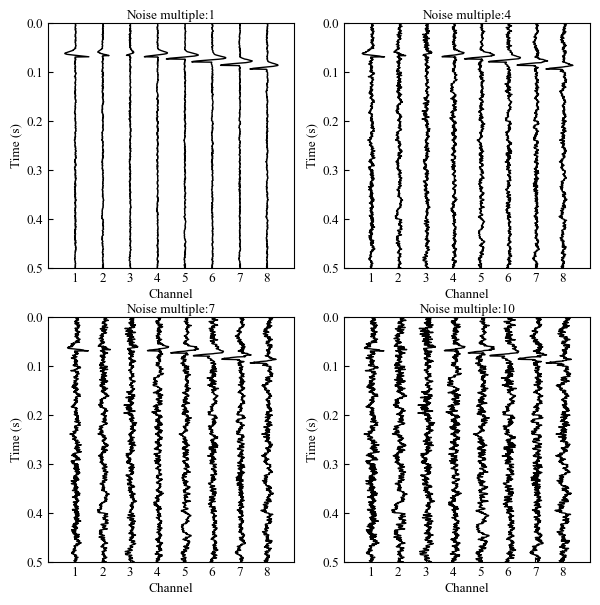

In [ ]:
# nu=[0,1,2,3,4,5,6,7,8,9,10]
nu=[1,4,7,10]
tit='Noise multiple'
n_r = len(st11) 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 7)) 
axes = axes.flatten() # 将二维数组展平为一维，便于循环处理
for zao in range(len(nu)):
    xx_i=np.zeros(n_r)
    ax = axes[zao]
    ww=W_wave[:,:,ii,nu[zao]]
    yu=np.max(ww)*2
    for i in range(n_r):
        xx_i[i] = i * yu
        ax.plot(ww[i,:]+ xx_i[i], t, 'k', linewidth=1)

    ax.xaxis.set_ticks(xx_i)
    ax.set_xticklabels(range(1, n_r+1)) 
    ax.set_xlabel('Channel', labelpad=3)
    ax.set_ylabel('Time (s)', labelpad=3)
    x_min = xx_i[0]-yu 
    x_max = xx_i[-1]+yu
    y_min = np.min(t)  
    y_max = np.max(t) 
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(tit + ':' + str(nu[zao]), pad=3)
    ax.invert_yaxis()
    # plt.axis([x_min, x_max, y_min, y_max])
    # plt.gca().invert_yaxis() 
    # plt.tight_layout()
# plt.savefig("fig4.tif", dpi=300, format="tiff", bbox_inches="tight", pil_kwargs={"compression": "tiff_lzw"})
plt.show()
    